In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [18]:
def f(x,y):
    return np.exp(-(x**2-y**2)/10)-0.5

In [19]:
x = np.arange(-5,5,0.5)
y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

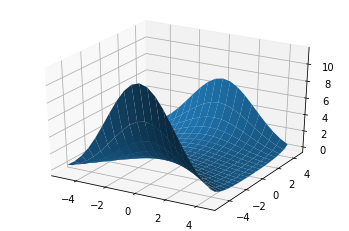

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
plt.show()

In [21]:
tempX = X.reshape(1,400)
tempY = Y.reshape(1,400)
target = Z.reshape(400,)
data = np.concatenate((tempX,tempY),axis=0)

In [22]:
data.shape

(2, 400)

In [23]:
from algorithms.generalised_delta import TwoLP

In [24]:
tlp = TwoLP(nodes_num=2, output_dim=1, features_num=3, lr=0.01)

In [25]:
tlp.train(data.T, target, epochs=200)

Epoch 0, MSE:2.7454628151397094
Epoch 1, MSE:2.6198322540668157
Epoch 2, MSE:2.445986633766748
Epoch 3, MSE:2.3170491921128376
Epoch 4, MSE:2.249905911176702
Epoch 5, MSE:2.2157017696661274
Epoch 6, MSE:2.1941414154150105
Epoch 7, MSE:2.177718185185509
Epoch 8, MSE:2.164888561088246
Epoch 9, MSE:2.1559917558745236
Epoch 10, MSE:2.150933521745175
Epoch 11, MSE:2.148558138023731
Epoch 12, MSE:2.147443418806319
Epoch 13, MSE:2.1466452869191213
Epoch 14, MSE:2.1457265045235765
Epoch 15, MSE:2.1445169125804466
Epoch 16, MSE:2.1429408538151877
Epoch 17, MSE:2.1409378791529967
Epoch 18, MSE:2.1384312161917367
Epoch 19, MSE:2.135313903706198
Epoch 20, MSE:2.13144003235084
Epoch 21, MSE:2.1266178951638315
Epoch 22, MSE:2.120607867335076
Epoch 23, MSE:2.1131353946778804
Epoch 24, MSE:2.1039424112402396
Epoch 25, MSE:2.0929183372057376
Epoch 26, MSE:2.080353123596049
Epoch 27, MSE:2.067262078629441
Epoch 28, MSE:2.055441041495815
Epoch 29, MSE:2.0466657906293095
Epoch 30, MSE:2.041232878379971
Ep

In [26]:
data.shape

(2, 400)

In [27]:
data = data.T
data = np.c_[data, np.ones(data.shape[0])]
data = data.T
_, out = tlp.forward_pass(data)

In [30]:
Z2 = out.reshape(20,20)

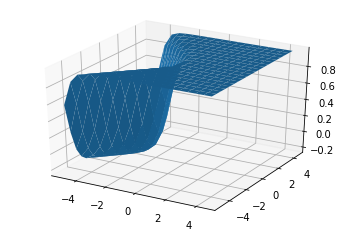

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z2)
plt.show()

In [29]:
Z.shape

(20, 20)

In [28]:
out.shape

(1, 400)